In [1]:
import os
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', 500)
DROOT = os.path.join('../1-data/')

In [77]:
postcodes = gpd.read_file('../1-data/2023-CBS_pc5_2022_v1/cbs_pc5_2022_v1.gpkg')
postcodes.insert(1, 'postcode4', postcodes.postcode5.str.slice(0, 4))
postcodes.head(1)

,postcode5,postcode4,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,percentage_geb_nederland_herkomst_overig_europa,percentage_geb_nederland_herkomst_buiten_europa,percentage_geb_buiten_nederland_herkomst_europa,percentage_geb_buiten_nederland_herkmst_buiten_europa,aantal_part_huishoudens,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,gemiddelde_huishoudensgrootte,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,geometry
0,1011E,1011,620,300,315,45,90,215,165,100,60,10,10,10,10,400,240,100,35,25,1.5,415,335,-99997,-99997,30,40,-99997,-99997,-99997,390,20,80,180,60,487,60,"MULTIPOLYGON (((121952.788 487307.132, 121953...."


In [78]:

postcodes = gpd.read_file('../1-data/2023-CBS_pc4_2022_v1/cbs_pc4_2022_v1.gpkg')
postcodes.head(1)

,postcode4,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,percentage_geb_nederland_herkomst_overig_europa,percentage_geb_nederland_herkomst_buiten_europa,percentage_geb_buiten_nederland_herkomst_europa,percentage_geb_buiten_nederland_herkmst_buiten_europa,aantal_part_huishoudens,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,gemiddelde_huishoudensgrootte,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry
0,1184,625,320,305,100,90,110,215,110,70,10,10,10,10,255,70,70,20,95,2.4,245,165,10,-99997,10,20,10,25,-99997,20,80,20,15,10,902,15,585,4,"MULTIPOLYGON (((121294.892 478995.293, 121341...."


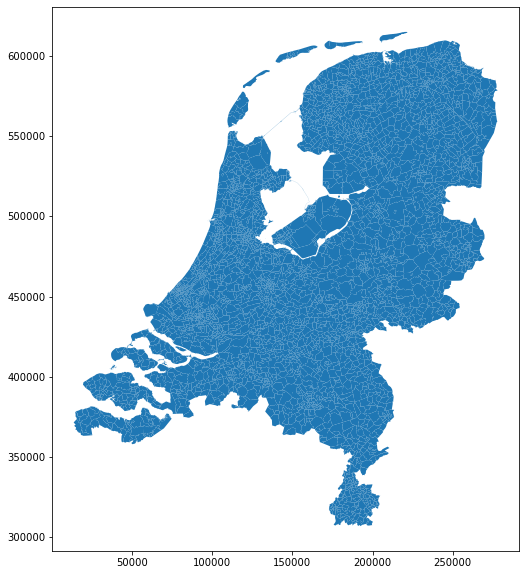

In [57]:
postcodes.geometry.plot(figsize=(10,10))

In [4]:
postcodes_utm = postcodes.to_crs(postcodes.estimate_utm_crs())
postcodes['centroid_pt'] = postcodes_utm.centroid.to_crs(postcodes.crs)
postcodes['area'] = postcodes_utm.area


In [11]:
pd.cut(postcodes.area // 1e6, 10).value_counts()

(-0.117, 11.7]    32988
(11.7, 23.4]        377
(23.4, 35.1]         40
(35.1, 46.8]          5
(46.8, 58.5]          4
(58.5, 70.2]          2
(105.3, 117.0]        1
(81.9, 93.6]          1
(70.2, 81.9]          1
(93.6, 105.3]         0
dtype: int64

In [68]:
odin_df = pd.concat([
    pd.read_csv(os.path.join(DROOT, 'ODiN2021_Databestand.csv'), sep=';', encoding= 'unicode_escape'),
    pd.read_csv(os.path.join(DROOT, 'ODiN2018_Databestand_v2.0.csv'), sep=';', encoding= 'unicode_escape')
])
odin_df

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqLopen,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,FqMotor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,VertMRDH,VertUtr,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,AankMRDH,AankUtr,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV
0,1,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18,21,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9,3,5,5,5,2,2,5,9,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725401,1,0,1,9,8,6,3,12,1,0,1363.0,1.0,34,5,40,15,18,21,0,1319.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,16,0,9,16,15,15,4,210,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540101,1,75,0,7,1,2,3,2,16,0,16,15,15,0,0.0,0.0,13,0,0,94,188,68606
1,0,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18,21,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9,3,5,5,5,2,2,5,9,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725402,2,0,1,1,8,6,3,12,4,0,1319.0,1.0,34,5,40,15,18,21,0,1363.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,19,45,12,20,0,15,4,#NULL!,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540201,1,75,0,7,1,2,3,2,19,45,20,0,15,0,0.0,0.0,13,0,0,94,188,68606
2,1,62344112710,1,1,2,2,3,0,0,0,2,8423,85,5,4,2,6,0,20,18,21,1,72,16,1,0,2,7,3,10,10,8,9,10,2,0,2,1,0,1,1,0,1,1,0,0,2007,1,4,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,1,3,3,9,5,1,5,5,2,4,5,9,4,2021,1,1,4,2,0,1,0,0,0,0,6,0,0,1,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,64,180,0,1,6234411271001,1,0,1,2,1,1,3,12,1,0,8423.0,1.0,85,2,6,20,18,21,0,8423.0,1.0,85,2,6,20,18,21,0.0,0,0.0,30,4,7,4,5,7,15,3,7,24,9,2,56,0,1,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441127100101,1,30,0,4,7,4,11,5,7,15,7,24,9,0,0.0,0.0,13,0,0,90,181,66023
3,0,62344112710,1,1,2,2,3,0,0,0,2,8423,85,5,4,2,6,0,20,18,21,1,72,16,1,0,2,7,3,10,10,8,9,10,2,0,2,1,0,1,1,0,1,1,0,0,2007,1,4,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,1,3,3,9,5,1,5,5,2,4,5,9,4,2021,1,1,4,2,0,1,0,0,0,0,6,0,0,1,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,64,180,0,1,6234411271002,2,0,1,1,1,1,3,12,3,0,8423.0,1.0,85,2,6,20,18,21,0,8423.0,1.0,85,2,6,20,18,21,0.0,0,0.0,30,4,7,4,5,8,20,4,8,30,10,3,75,0,9,#NU

In [22]:
odin_df = 
odin_df

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV
0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759
1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759
2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759
3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,11,5,18,30,18,35,5,

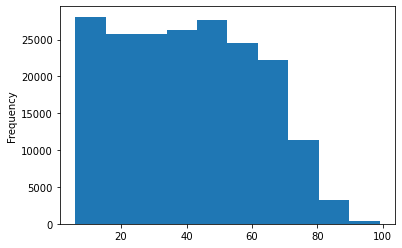

In [23]:
odin_df.Leeftijd.plot.hist()

In [26]:
print(odin_df.Verpl.value_counts())
odin_df_f = odin_df[odin_df.Verpl.isin(['0', '1'])] # Filter serie-verplaatsingen
odin_df_f.Verpl.value_counts()

1         166635
0          19391
#NULL!      8119
6            845
8            132
7            116
Name: Verpl, dtype: int64


1    166635
0     19391
Name: Verpl, dtype: int64

In [30]:
# Aantal ritten per verplaatsing.
odin_df_f.AantRit.value_counts()

1     156006
3      15375
2       7835
4       5036
5       1295
6        216
7        168
8         48
9         36
11        11
Name: AantRit, dtype: int64

In [35]:
odin_df_f['VerplID_unic'] = odin_df_f.VerplID.str.slice(0, 11)
odin_df_f[['VerplID', 'VerplID_unic', 'VerplNr']]

/Users/ivo/opt/anaconda3/envs/thesis-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,VerplID,VerplID_unic,VerplNr
0,5583410009301,55834100093,1
1,5583410009302,55834100093,2
2,5583410009303,55834100093,3
3,5583410009304,55834100093,4
4,5583410027901,55834100279,1
...,...,...,...
195233,5894409889504,58944098895,4
195234,5894409889504,58944098895,4
195235,5894410590101,58944105901,1
195236,5894412276501,58944122765,1


In [39]:
# Filter for train only
bike_trip = odin_df_f.groupby('VerplID_unic').apply(lambda x: x.KRvm.isin(['5']).sum() > 0)
print(bike_trip.sum())
bike_trip

20630


VerplID_unic
55834100093     True
55834100279    False
55834100372     True
55834100527     True
55834100589     True
               ...  
58944079830    False
58944090091    False
58944098895    False
58944105901    False
58944122765    False
Length: 49135, dtype: bool

In [53]:
odin_df_f[odin_df_f.Rvm.isin(['7', '8'])].VertPC.value_counts().index

Float64Index([   0.0, 3511.0, 1181.0, 2611.0, 1018.0, 2628.0, 3512.0, 1017.0,
              6525.0, 3584.0,
              ...
              1634.0, 6199.0, 3899.0, 1636.0, 7938.0, 8806.0, 4721.0, 3243.0,
              2374.0, 7863.0],
             dtype='float64', length=3203)

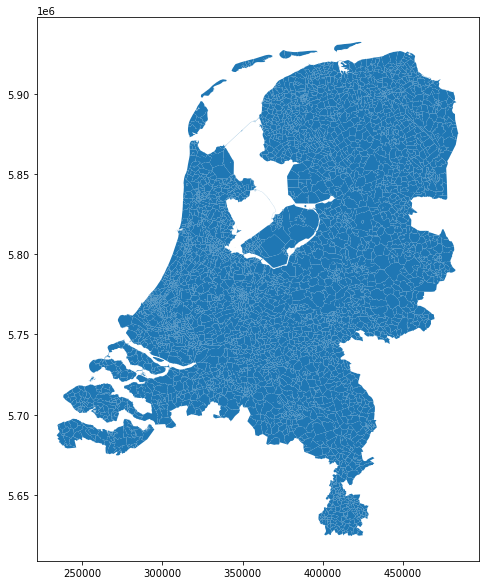

In [76]:
postcodes.to_crs('ESRI:54008').plot(figsize=(10,10))

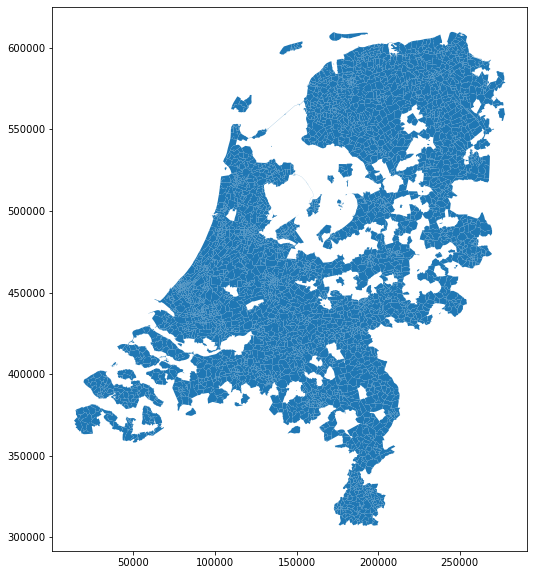

In [67]:
postcodes[postcodes.area < (3 * 10e6)].plot(figsize=(10,10))

In [58]:
bike_pc = odin_df_f[odin_df_f.Rvm.isin(['7', '8'])].VertPC.value_counts()
bike_pc.index = bike_pc.index.astype(int).astype(str)
gdf_bikers = pd.merge(bike_pc, postcodes.set_index('postcode4'), left_index=True, right_index=True)
gdf_bikers.head(4)

,VertPC,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,percentage_geb_nederland_herkomst_overig_europa,percentage_geb_nederland_herkomst_buiten_europa,percentage_geb_buiten_nederland_herkomst_europa,percentage_geb_buiten_nederland_herkmst_buiten_europa,aantal_part_huishoudens,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,gemiddelde_huishoudensgrootte,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry
3511,168,9285,4610,4680,460,1395,4335,1810,1285,70,0,10,10,10,6200,4030,1655,145,375,1.5,5200,2745,90,10,535,1145,290,115,270,4170,30,70,850,555,479,510,5624,1,"MULTIPOLYGON (((136399.702 456517.728, 136409...."
1181,152,20950,10185,10765,4395,2145,5540,5270,3600,50,10,10,10,30,9215,3485,2140,625,2965,2.3,9165,1920,4835,1305,5,335,465,110,185,4705,60,40,995,470,573,695,3262,1,"MULTIPOLYGON (((119679.050 481656.637, 119679...."
2611,148,13250,7300,5955,885,3385,4445,2725,1810,60,0,10,10,20,8845,5960,1960,230,695,1.5,6790,3865,105,95,1155,750,220,255,350,4930,40,60,1465,580,380,580,4711,1,"MULTIPOLYGON (((84384.810 446705.463, 84379.10..."
1018,135,21055,10665,10390,1925,2735,7330,5535,3530,50,0,10,10,20,12760,7855,2840,735,1335,1.6,11750,5230,145,225,1295,3075,985,405,390,11530,30,70,5125,800,494,2070,6959,1,"MULTIPOLYGON (((118297.429 485188.897, 118297...."


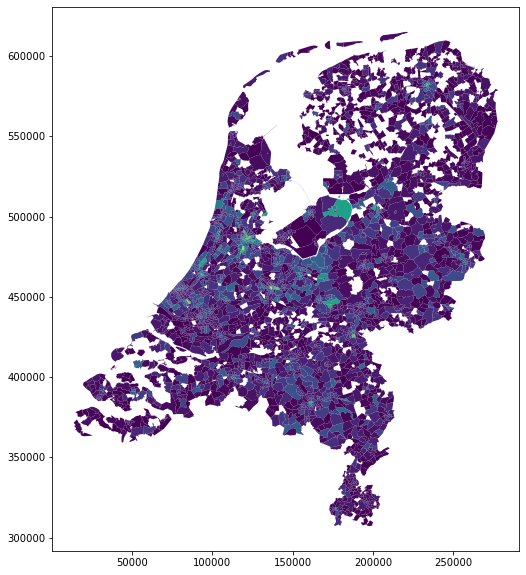

In [62]:
gpd.GeoDataFrame(gdf_bikers).plot(column='VertPC', figsize=(10,10))

In [40]:
odin_df_f[odin_df_f.VerplID_unic == '55834100372']

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,VerplID_unic
7,1,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037201,1,0,1,2,1,1,3,12,1,0,9785.0,1.0,5,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,80,7,8,4,5,7,45,3,8,10,25,6,230,0,2,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720101,1,80,0,7,8,4,11,5,7,45,8,10,25,0,0.0,0.0,13,0,0,115,229,83598,55834100372
8,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037202,2,0,1,2,1,1,3,12,3,0,9743.0,1.0,14,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,2,1,9,4,6,12,0,6,12,1,1,1,29,0,3,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720201,1,2,0,1,9,4,11,6,12,0,12,1,1,0,0.0,0.0,13,0,0,115,229,83598,55834100372
9,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037203,3,0,1,4,3,2,3,6,3,0,9743.0,1.0,14,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,2,1,9,4,6,12,30,6,12,40,10,3,320,0,1,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720301,1,2,0,1,9,4,11,6,12,30,12,40,10,0,0.0,0.0,13,0,0,115,229,83598,55834100372
10,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037204,4,0,1,1,3,2,3,12,3,0,9743.0,1.0,14,1,3,18,0,9785.0,1.0,5,1,3,18,0.0,0,0.0,100,8,8,4,5,18,0,11,18,45,45,8,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!